Week Eight - Assignment High Frequency Words <br>
Vladimir Nimchenko <br>
Evan McLaughlin

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
# We decided to use Mary Shelley's Frankenstein for our corpus.
# We'll begin by importing the necessary packages and reading in the book, along with assigning the beginning and end of the text.
import nltk
import re
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://www.gutenberg.org/cache/epub/84/pg84.txt"
response = urllib.request.urlopen(url)
raw = response.read().decode('utf8')
startTextString = "START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS"
endTextString = "END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN; OR, THE MODERN PROMETHEUS"
textStart = raw.find(startTextString)
textEnd = raw.rfind(endTextString)
rawText = raw[textStart+len(startTextString):textEnd]



In [2]:
# let's just check to make sure it's starting where we want
str(rawText[0:50])

' ***\r\n\r\n\r\n\r\n\r\nFrankenstein;\r\n\r\nor, the Modern Prom'

In [3]:
# In order to begin our analysis of unique words, we need to tokenize the raw text and narrow our analysis to strictly alphabetic words
tokens = nltk.word_tokenize(rawText)
words = [w.lower() for w in tokens if w.isalpha()]
nWords = len(set(words))
print("Total unique words in the corpus:", nWords)




Total unique words in the corpus: 6887


In [4]:
# To refine our analysis, we employ stemming and lemmatizing to group sufficiently-similar words for a more accurate count
ps = nltk.stem.PorterStemmer()
wordnet = nltk.stem.WordNetLemmatizer()
wordsrefined = [ps.stem(wordnet.lemmatize(w)) for w in words]
nWordsrefined = len(set(wordsrefined))
print("Total unique words in the corpus (refined):", nWordsrefined)


Total unique words in the corpus (refined): 4614


In [6]:
# The dataframe below is created to calculate the overall frequency, followed by analyzing the records comprising half the total words

fdWords = nltk.FreqDist(wordsrefined)
wordsDf = pd.DataFrame.from_dict(fdWords, orient='index', columns=['frequencyCount'])
wordsDf.sort_values(by='frequencyCount', ascending=False, inplace=True)
wordsDf['cumulativeFrequencyCount'] = wordsDf['frequencyCount'].cumsum()
wordsDf['cumulativeFrequencyPercent'] = wordsDf['cumulativeFrequencyCount'] / wordsDf['frequencyCount'].sum()
half_total_words = len(wordsrefined) / 2
words_half_total = wordsDf[wordsDf['cumulativeFrequencyCount'] <= half_total_words]
print("Unique words representing half of the total words in Frankenstein:", len(words_half_total))



Unique words representing half of the total words in Frankenstein: 56


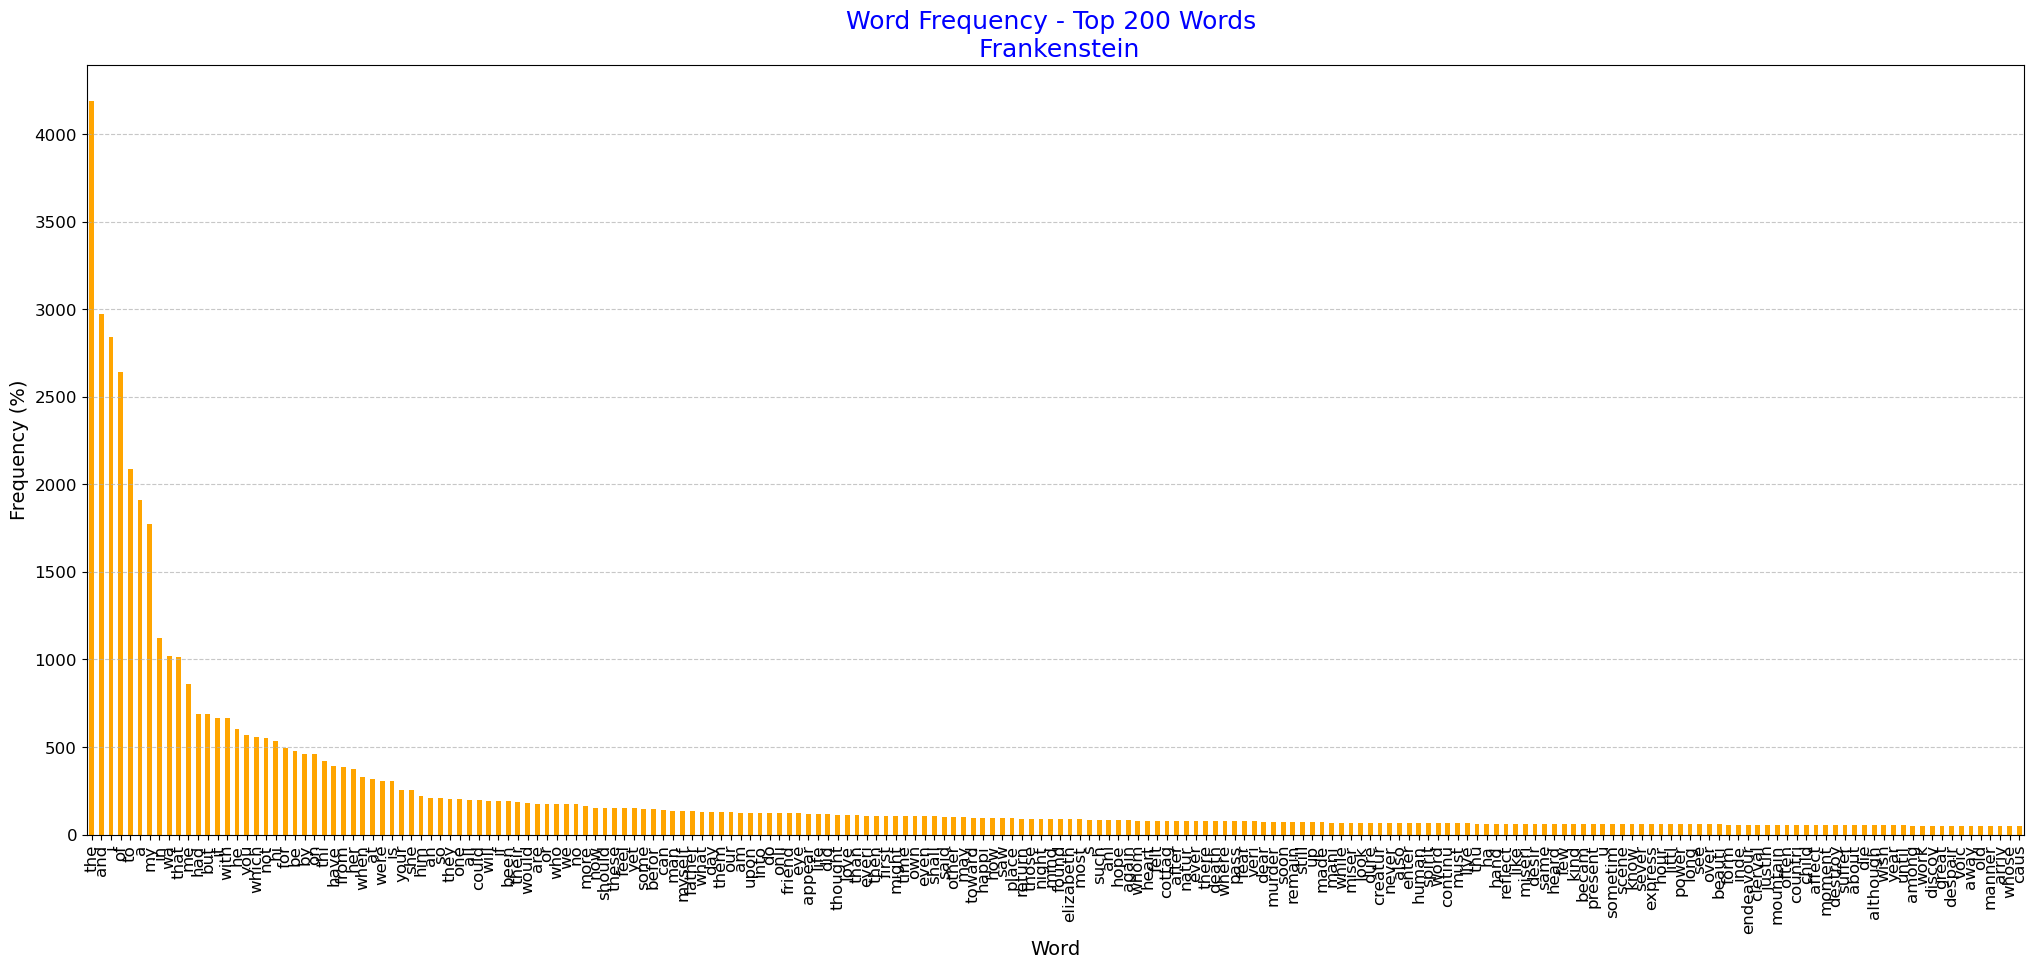

In [7]:
# let's next focus on the the 200 most-used words in the book, visualizing them on a barplot
top_200 = wordsDf.head(200)
plt.figure(figsize=(25,10))
plt.title("Word Frequency - Top 200 Words \n Frankenstein", fontsize=18, color='blue')
top_200['frequencyCount'].plot(kind='bar', color='orange')
plt.ylabel("Frequency (%)", fontsize=14)
plt.xlabel("Word", fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


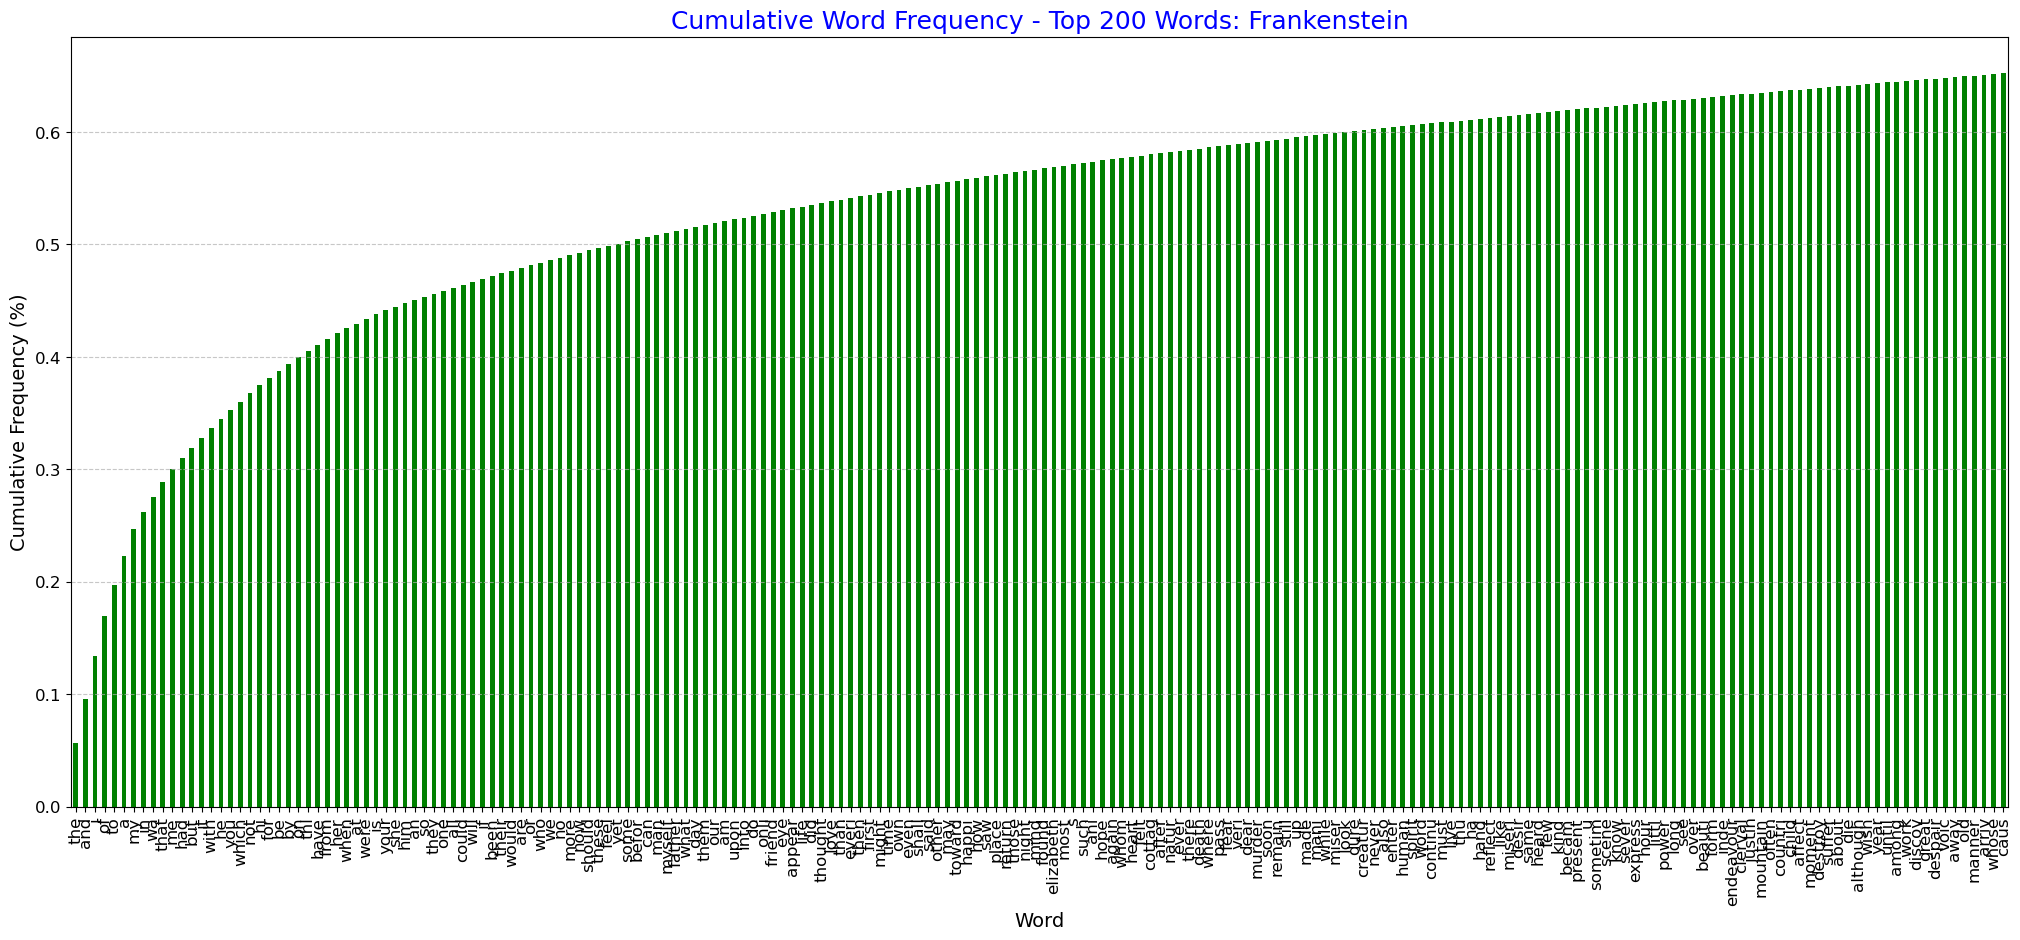

In [9]:
# From here's it's easy to look at the cumulative relative frequency of the top 200 words
plt.figure(figsize=(25,10))
plt.title("Cumulative Word Frequency - Top 200 Words: Frankenstein", fontsize=18, color='blue')
top_200['cumulativeFrequencyPercent'].plot(kind='bar', color='green')
plt.ylabel("Cumulative Frequency (%)", fontsize=14)
plt.xlabel("Word", fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


6. Zipf's law is a relation between rank order and frequency of occurance. It says that when words are ranked by their frequency, the frequency of a particular observation is inversly proportional to its rank. In other words, the most frequent word will occur twice as often as the second most frequent word and three times as often as the third most frequent word. In our case, as demonstrated by the "Word Frequency - Top 200 Words: Frankenstien" histogram"  the observed relative frequencies of any particular word is inversly proportional to its ranking in the frequency table.

7. The way in which the frequency of the words in this corpus differ from "all words in all corpora" is the context in which they present themselves. Each context will have a different theme and thus the words will be applied differently. However, common words or words which connect sentences(is,if,and,etc....) will be used accross all corpora. Here, we can see that Zipf's law is applicable to common words, in that they are used most often but do not have high rank highly.